## Cox Proportional Hazard

 The Cox PH model is usually written in terms of the hazard model:
 $$h(t,X)= h_0(t)  \sum\limits_{i=1}^{p} exp (β_{i} X_{i})$$

where the $h_0$ is the baseline hazard, and the dot product of $\beta$ and $X$ is taken in the exponent just like in linear regression. An important feature of this formula which concerns PH assumption is that the baseline hazard is a function of $t$, but doesn't involve the $X$’s. The baseline hazard is property that makes the Cox model a semiparametric model.
In contrast, a parametric model is one whose functional form is completely specified, but the results from using the Cox model will closely approximate the results for the correct parametric model. This is why the Cox PH model is so popular.

In a nonparametric model, we make no assumptions about the functional form of $h$. The downside is this makes it hard to model any effects of covariates.     
In a parametric model, we make an assumption for the precise functional form of $h$.

#### When should we use a semiparametric model and a parametric model?

We could use a parametric model if we were sure of the correct model by using a specified probability distribution. In certain contexts, there may be reasons to believe a parametric model is a good fit, but with several options available, there is a strong risk of drawing incorrect conclusions due to misspecification of the model. Thus when in doubt, the Cox model is a safe choice.

#### Cox PH Assumption

The PH assumption is the hazard ratio for the two groups should remain proportional, which means that the hazard ratio is constant over time. The most popular graphical techniques for evaluating the PH assumption involves comparing estimated the log-log survival curves or Kaplan-Meier curves. If the graph of the hazard/survival cross for two or more categories of a predictor, the PH assumption is not met. However, althought the functions do not cross, it is possible that the PH assumption is not met.

### Libraries

In [1]:
library(survival)

Warning message:
"package 'survival' was built under R version 3.6.3"

In [2]:
library(KMsurv)

### Data

In this repository, I'll be using Cox regression to analyze the dataset of 154 burn patients. The dataset was originally collected in: https://search.r-project.org/CRAN/refmans/GPLTR/html/burn.html

In [3]:
data(burn)

In [4]:
head(burn)

Obs,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,Z10,Z11,T1,D1,T2,D2,T3,D3
1,0,0,0,15,0,0,1,1,0,0,2,12,0,12,0,12,0
2,0,0,1,20,0,0,1,0,0,0,4,9,0,9,0,9,0
3,0,0,1,15,0,0,0,1,1,0,2,13,0,13,0,7,1
4,0,0,0,20,1,0,1,0,0,0,2,11,1,29,0,29,0
5,0,0,1,70,1,1,1,1,0,0,2,28,1,31,0,4,1
6,0,0,1,20,1,0,1,0,0,0,4,11,0,11,0,8,1


### Explanation of Dataset

Obs: Observation number

Z1: Treatment (0=routine bathing, 1=body cleansing)

Z2: Gender (0=male, 1=female)

Z3: Race (0=nonwhite, 1=white)

Z4: Percentage of total surface area burned

Z5: Burn site indicator: (head 1=yes, 0=no)

Z6: Burn site indicator: (buttock 1=yes, 0=no)

Z7: Burn site indicator: (trunk 1=yes, 0=no)

Z8: Burn site indicator: (upper leg 1=yes, 0=no)

Z9: Burn site indicator: (lower leg 1=yes, 0=no)

Z10: Burn site indicator: (respiratory tract 1=yes, 0=no)

Z11: Type of burn: (1=chemical, 2=scald, 3=electric, 4=flame)

T1: Time to excision or on study time

D1: Excision indicator: (1=yes, 0=no)

T2: Time to prophylactic antibiotic treatment or on study time

D2: Prophylactic antibiotic treatment: (1=yes, 0=no)

T3: Time to straphylocous aureaus infection or on study time

D3: Straphylocous aureaus infection: (1=yes, 0=no)

In [6]:
#formula
type.burn <- survfit(Surv(T1,D1)~Z11,data=burn)
summary(type.burn)

Call: survfit(formula = Surv(T1, D1) ~ Z11, data = burn)

                Z11=1 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    1      9       1    0.889   0.105       0.7056        1.000
    2      8       1    0.778   0.139       0.5485        1.000
    3      7       1    0.667   0.157       0.4200        1.000
    5      6       1    0.556   0.166       0.3097        0.997
    8      5       1    0.444   0.166       0.2141        0.923
   11      4       1    0.333   0.157       0.1323        0.840
   14      2       1    0.167   0.142       0.0315        0.882

                Z11=2 
 time n.risk n.event survival std.err lower 95% CI upper 95% CI
    4     18       1    0.944  0.0540        0.844        1.000
    5     17       1    0.889  0.0741        0.755        1.000
    8     15       1    0.830  0.0898        0.671        1.000
   10     14       1    0.770  0.1010        0.596        0.996
   11     12       1    0.706  0.1112        0.519        0.961

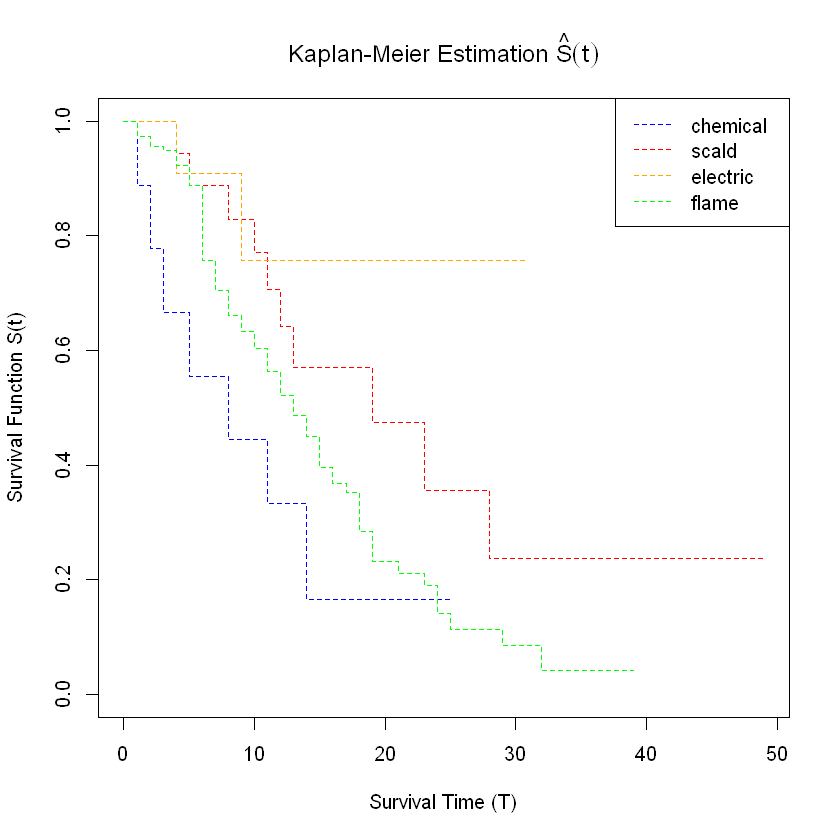

In [7]:
#plot survival function from each type of burn
plot(type.burn, lty = 2:2:2:2,
     col=c("blue","red","orange","green"),
     main=expression(paste("Kaplan-Meier Estimation ",  hat(S)(t))),
     xlab="Survival Time (T)", ylab="Survival Function S(t)")
legend("topright", c("chemical", "scald","electric","flame"),
       col=c("blue","red","orange","green"), lty = 2:2:2:2)

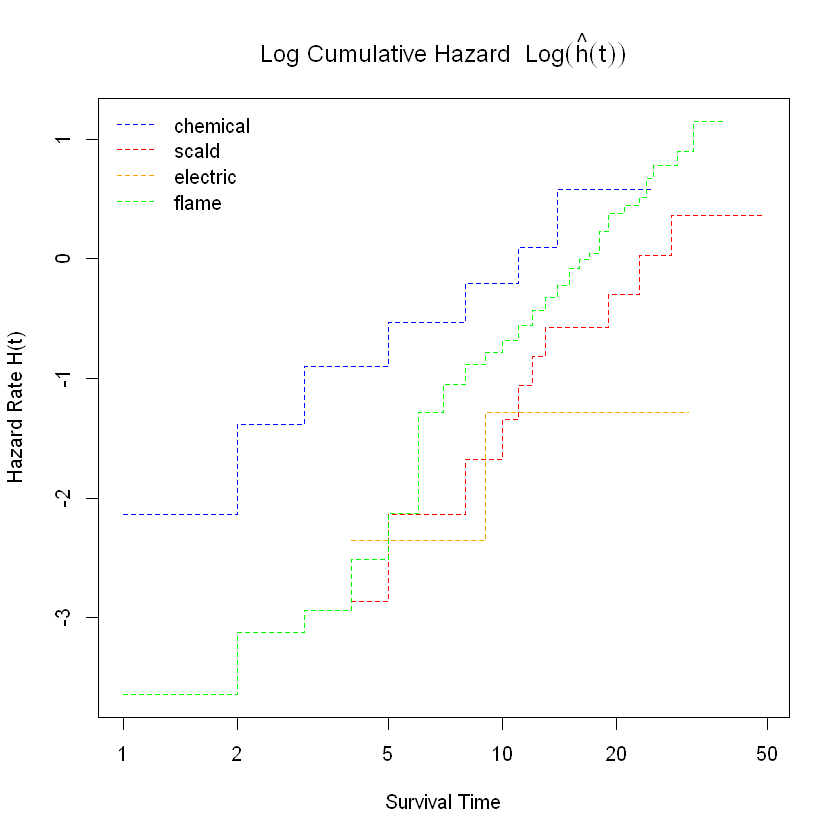

In [8]:
#log cumulative hazard
plot(type.burn, lty=2:2:2:2, fun="cloglog",
     main=expression(paste("Log Cumulative Hazard  ", Log(hat(h)(t)))),
     xlab="Survival Time", ylab="Hazard Rate H(t)",
     col=c("blue","red","orange","green"))
legend("topleft", lty=2:2:2:2,
      legend=c("chemical","scald","electric","flame"),
       bty="n", col=c("blue","red","orange","green"))

The above plots shows graph of the survival curves and hazard rates are crossing for three categories of a predictor (scale, electric flame). If the curves cross, then one group has a higher risk at early time points and the other group has a higher risk at late time points. This could just be a coincidence of random sampling, and the PH assumption could still be valid. Thus, Tarone-Ware test and Gehan-Wilcoxon test will be conducted as an alternative test.

*Hypothesis*

$H_0$: there is no relationship between each type of burn and the need for excision

$H_1$: there is at least one of the type of burn that affected the need for excision


The test statistic for equality of survival across the $k$ groups is approximately chi-square distributed on $k-1$ degrees of freedom.

In [9]:
#Tarone-Ware test
survdiff(Surv(T1,D1)~Z11,data=burn,rho=(1/2))

Call:
survdiff(formula = Surv(T1, D1) ~ Z11, data = burn, rho = (1/2))

        N Observed Expected (O-E)^2/E (O-E)^2/V
Z11=1   9     6.27     3.41     2.401      3.17
Z11=2  18     7.38    11.82     1.668      2.62
Z11=3  11     1.80     5.12     2.156      2.90
Z11=4 116    63.73    58.83     0.408      2.06

 Chisq= 8.5  on 3 degrees of freedom, p= 0.04 

In [10]:
#Gehan-Wilcoxon test
survdiff(Surv(T1,D1)~Z11,data=burn,rho=1)

Call:
survdiff(formula = Surv(T1, D1) ~ Z11, data = burn, rho = 1)

        N Observed Expected (O-E)^2/E (O-E)^2/V
Z11=1   9     5.70     2.86     2.826      4.12
Z11=2  18     5.75     9.40     1.414      2.46
Z11=3  11     1.62     4.31     1.675      2.48
Z11=4 116    52.78    49.29     0.248      1.41

 Chisq= 8.7  on 3 degrees of freedom, p= 0.03 

In the Tarone-Ware test and Gehan-Wilcoxon test, we can see that those have p-values less than $\alpha$ (0,04 < 0,05 and 0,03 < 0,05), so the null hypothesis is rejected. This indicates a relationship between each type of burn and the need for excision.
We consider tied survival data based on Cox PH model. The standard approaches are the Breslow, Efron, and Exact approximations.
Thus in the next case, we would like to measure how much impact of the type of burn on having an excision using Breslow method, Efron method, and Exact method.

#### PH Model

$$h(t,x)= h_0(t) . exp(β_{1}Z_{11.1} + β_{2}Z_{11.2} + β_{3}Z_{11.3} + β_{4}Z_{11.4})$$

* $h_0(t)$ is the baseline hazard and  a "chemical burn" ($Z_{11.1}$) is defined as the baseline condition

In [11]:
#Breslow method
model1 <- coxph(Surv(T1,D1)~as.factor(Z11),data=burn,method="breslow")
summary(model1)

Call:
coxph(formula = Surv(T1, D1) ~ as.factor(Z11), data = burn, method = "breslow")

  n= 154, number of events= 99 

                   coef exp(coef) se(coef)      z Pr(>|z|)  
as.factor(Z11)2 -0.9681    0.3798   0.4957 -1.953   0.0508 .
as.factor(Z11)3 -1.6627    0.1896   0.8029 -2.071   0.0384 *
as.factor(Z11)4 -0.4105    0.6633   0.3957 -1.037   0.2996  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                exp(coef) exp(-coef) lower .95 upper .95
as.factor(Z11)2    0.3798      2.633   0.14376    1.0034
as.factor(Z11)3    0.1896      5.273   0.03931    0.9148
as.factor(Z11)4    0.6633      1.508   0.30546    1.4406

Concordance= 0.57  (se = 0.026 )
Likelihood ratio test= 8.74  on 3 df,   p=0.03
Wald test            = 7.09  on 3 df,   p=0.07
Score (logrank) test = 7.66  on 3 df,   p=0.05


#### Interpretation

1. Someone with a "scald" burn is 0,3798 times more likely to receive an excision compared to those who experiences a "chemical" burn
2. Someone with an "electric" burn is 0,1896 times more likely to receive an excision compared to those who experiences a "chemical" burn
3. Someone with a "flame" burn is 0,6633 times more likely to receive an excision compared to those who experiences a chemical burn
4. According to the Breslow method, someone who experiences an **electric** burn has the **lowest risk** of receiving an excision treatment, and the **chemical** burn has the **highest risk**

In [14]:
#Efron method
model2 <- coxph(Surv(T1,D1)~as.factor(Z11),data=burn,method="efron")
summary(model2)

Call:
coxph(formula = Surv(T1, D1) ~ as.factor(Z11), data = burn, method = "efron")

  n= 154, number of events= 99 

                   coef exp(coef) se(coef)      z Pr(>|z|)  
as.factor(Z11)2 -0.9820    0.3745   0.4956 -1.982   0.0475 *
as.factor(Z11)3 -1.6872    0.1850   0.8029 -2.101   0.0356 *
as.factor(Z11)4 -0.4070    0.6656   0.3957 -1.029   0.3037  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                exp(coef) exp(-coef) lower .95 upper .95
as.factor(Z11)2    0.3745      2.670   0.14180    0.9893
as.factor(Z11)3    0.1850      5.404   0.03836    0.8926
as.factor(Z11)4    0.6656      1.502   0.30647    1.4456

Concordance= 0.57  (se = 0.026 )
Likelihood ratio test= 9.17  on 3 df,   p=0.03
Wald test            = 7.38  on 3 df,   p=0.06
Score (logrank) test = 8  on 3 df,   p=0.05


#### Interpretation

1. Someone with a "scald" burn is 0,3745 times more likely to receive an excision compared to those who experiences a "chemical" burn
2. Someone with an "electric" burn is 0,185 times more likely to receive an excision compared to those who experiences a "chemical" burn
3. Someone with a "flame" burn is 0,6656 times more likely to receive an excision compared to those who experiences a "chemical" burn
4. According to the Efron method, someone who experiences an **electric** burn has the **lowest risk** of receiving an excision treatment, and the **chemical** burn has the **highest risk**

In [15]:
#Exact method
model3 <- coxph(Surv(T1,D1)~as.factor(Z11),data=burn,method="exact")
summary(model3)

Call:
coxph(formula = Surv(T1, D1) ~ as.factor(Z11), data = burn, method = "exact")

  n= 154, number of events= 99 

                   coef exp(coef) se(coef)      z Pr(>|z|)  
as.factor(Z11)2 -1.0312    0.3566   0.5144 -2.004   0.0450 *
as.factor(Z11)3 -1.7418    0.1752   0.8174 -2.131   0.0331 *
as.factor(Z11)4 -0.4449    0.6409   0.4152 -1.072   0.2839  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

                exp(coef) exp(-coef) lower .95 upper .95
as.factor(Z11)2    0.3566      2.804    0.1301    0.9774
as.factor(Z11)3    0.1752      5.707    0.0353    0.8697
as.factor(Z11)4    0.6409      1.560    0.2840    1.4461

Concordance= 0.57  (se = 0.026 )
Likelihood ratio test= 9.19  on 3 df,   p=0.03
Wald test            = 7.49  on 3 df,   p=0.06
Score (logrank) test = 8.12  on 3 df,   p=0.04


#### Interpretation

1. Someone with a "scald" burn is 0,3566 times more likely to receive an excision compared to those who experiences a "chemical" burn
2. Someone with an "electric" burn is 0,1752 times more likely to receive an excision compared to those who experiences a "chemical" burn
3. Someone with a "flame" burn is 0,6409 times more likely to receive an excision compared to those who experiences a chemical burn
4. According to the Exact method, someone who experiences an **electric** burn has the **lowest risk** of receiving an excision treatment, and the **chemical** burn has the **highest risk**

In [17]:
#Finding the best model based on lowest AIC
AIC(model1)

[1] 843.9668

In [18]:
AIC(model2)

[1] 837.7939

In [19]:
AIC(model3)

[1] 646.3206

### Conclusion

According to the three methods above, it is obtained that the burn type with the highest risk of receiving an excision treatment is chemical, and the burn type with the lowest risk of receiving an excision treatment is electric.

The best PH model is:

$$h(t,x)= h_0(t) . exp(-1,03 Z_{11.2} -1,74 Z_{11.3} - 0,44 Z_{11.4})$$